<a href="https://colab.research.google.com/github/sms0832/Geol_112_F25/blob/main/Fourier_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sine wave addition visualization - Fourier Analysis

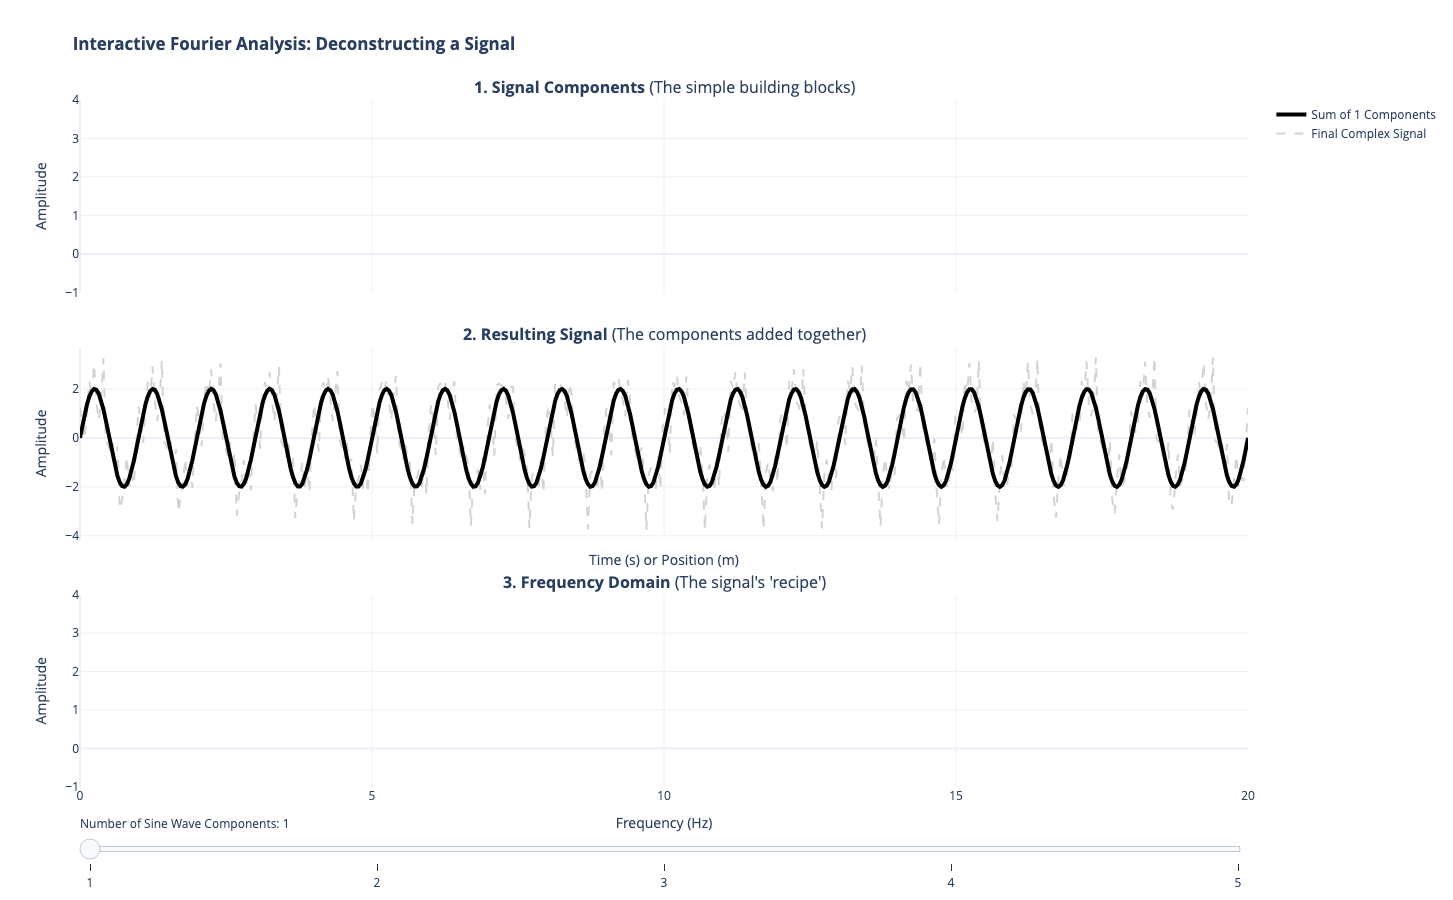

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# --- 1. Define the Component Sine Waves ---
x_axis = np.linspace(0, 20, 500)
x_label = "Time (s) or Position (m)"

# ## UPDATED PART: Expanded the "recipe" to 5 components ##
components = [
    {'freq': 1.0, 'amp': 2.0, 'phase': 0},      # Component 1: Low frequency, high amplitude
    {'freq': 5.0, 'amp': 0.8, 'phase': np.pi/2},# Component 2: Mid frequency, medium amplitude
    {'freq': 8.0, 'amp': 0.6, 'phase': np.pi/4},# Component 3: Mid frequency, medium amplitude
    {'freq': 12.0, 'amp': 0.5, 'phase': np.pi}, # Component 4: High frequency, low amplitude
    {'freq': 18.0, 'amp': 0.3, 'phase': 0}      # Component 5: Very high frequency, low amplitude
]

# --- 2. Pre-calculate the Signals and Their Sums ---
individual_waves = []
summed_waves = []
current_sum = np.zeros_like(x_axis)

for comp in components:
    wave = comp['amp'] * np.sin(2 * np.pi * comp['freq'] * x_axis + comp['phase'])
    individual_waves.append(wave)
    current_sum = current_sum + wave
    summed_waves.append(current_sum)

# --- 3. Create the Plotly Figure with 3 Subplots ---
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True, # Share the x-axis between the top two plots
    vertical_spacing=0.08,
    subplot_titles=(
        "<b>1. Signal Components</b> (The simple building blocks)",
        "<b>2. Resulting Signal</b> (The components added together)",
        "<b>3. Frequency Domain</b> (The signal's 'recipe')"
    )
)

# --- 4. Add Traces to the Figure ---
# ## UPDATED PART: Added more colors for the new components ##
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

# ## Add Traces to the TOP PLOT (Components) ##
for i, wave in enumerate(individual_waves):
    fig.add_trace(go.Scatter(
        x=x_axis, y=wave, mode='lines',
        line=dict(width=2, color=colors[i]),
        name=f'Component {i+1} ({components[i]["freq"]} Hz)',
        visible=False
    ), row=1, col=1)

# ## Add Traces to the MIDDLE PLOT (Resulting Signal) ##
fig.add_trace(go.Scatter(
    x=x_axis, y=summed_waves[-1], mode='lines',
    line=dict(color='lightgray', dash='dash'),
    name='Final Complex Signal'
), row=2, col=1)

for i, wave in enumerate(summed_waves):
    fig.add_trace(go.Scatter(
        x=x_axis, y=wave, mode='lines',
        line=dict(color='black', width=4),
        name=f'Sum of {i+1} Components',
        visible=(i==0)
    ), row=2, col=1)

# ## Add Traces to the BOTTOM PLOT (Frequency) ##
for i, comp in enumerate(components):
    fig.add_trace(go.Scatter(
        x=[comp['freq'], comp['freq']], y=[0, comp['amp']],
        mode='lines',
        line=dict(width=5, color=colors[i]),
        name=f'Frequency {i+1}',
        visible=False
    ), row=3, col=1)

# --- 5. Create the Slider ---
# The logic here is generic and adapts automatically to the new number of components
steps = []
num_comps = len(components)

for i in range(num_comps):
    visibility = []
    visibility.extend([True if k <= i else False for k in range(num_comps)])
    visibility.append(True)
    visibility.extend([True if k == i else False for k in range(num_comps)])
    visibility.extend([True if k <= i else False for k in range(num_comps)])

    step = dict(
        method="restyle",
        label=str(i + 1),
        args=[{"visible": visibility}]
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Number of Sine Wave Components: "},
    pad={"t": 25},
    steps=steps
)]

# --- 6. Update Layout and Show the Figure ---
fig.update_layout(
    sliders=sliders,
    title_text='<b>Interactive Fourier Analysis: Deconstructing a Signal</b>',
    height=900,
    template='plotly_white',
    legend=dict(traceorder='reversed')
)

fig.update_yaxes(title_text="Amplitude", row=1, col=1)
fig.update_yaxes(title_text="Amplitude", row=2, col=1)
fig.update_yaxes(title_text="Amplitude", row=3, col=1)

fig.update_xaxes(title_text=x_label, row=2, col=1)
# ## Expanded the frequency range to see all 5 spikes ##
fig.update_xaxes(title_text="Frequency (Hz)", range=[0, 20], row=3, col=1, matches=None)

fig.show()